# Predicting Buyer Retention to Evaluate Campaign Effectiveness at Shopee Indonesia


Author : Theofilus Arifin

---

## Introduction


---



**Background**

Here at Shopee Indonesia we run a lot of campaigns every single day. But, which campaigns bring more high-quality buyers? Is it only temporarily attracting new buyers which will churn after the campaigns are over? In this case, you are asked to create a machine learning model to predict whether a new buyer will later become a retained buyer or not according to their behavior in their first two weeks using our platform. Therefore we could assess whether a certain campaign is drawing more retained buyers or not.
 
 
 	
Here at Shopee Indonesia we run a lot of campaigns every single day. But, which campaigns bring more high-quality buyers? Is it only temporarily attracting new buyers which will churn after the campaigns are over? In this case, you are asked to create a machine learning model to predict whether a new buyer will later become a retained buyer or not according to their behavior in their first two weeks using our platform. Therefore we could assess whether a certain campaign is drawing more retained buyers or not.
Turn on screen reader support

**Objective**

Develop a robust predictive model that accurately identifies new buyers likely to be retained, enabling Shopee Indonesia to optimize marketing campaigns by focusing on initiatives that attract high-quality, long-term buyers.

## 1. Load Data


---



In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
%matplotlib inline

import warnings
import math
import scipy.stats as ss
from scipy.stats import pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [112]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [113]:
sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [114]:
df = pd.read_csv('./dataset.csv')
df.shape

(222378, 38)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222378 entries, 0 to 222377
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    222378 non-null  int64  
 1   regist_date                222378 non-null  object 
 2   gender                     222378 non-null  object 
 3   age_group                  222378 non-null  object 
 4   region                     222378 non-null  object 
 5   is_rural_or_urban          222378 non-null  object 
 6   is_buyer_14d               222378 non-null  int64  
 7   is_dp_buyer_14d            222378 non-null  int64  
 8   label                      222378 non-null  int64  
 9   new_buyer_initiative       222000 non-null  object 
 10  total_voucher_claim_14d    124471 non-null  float64
 11  total_order_14d            154801 non-null  float64
 12  gmv_14d                    154801 non-null  float64
 13  pdp_views_14d              21

In [116]:
df.head(3)

,user_id,regist_date,gender,age_group,region,is_rural_or_urban,is_buyer_14d,is_dp_buyer_14d,label,new_buyer_initiative,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_shopeepaylater,use_cod,use_va_bt,use_cc_debit,use_instant,use_sameday,use_nextday,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_sbs,shop_normal_shop,shop_flash_sale,activate_shopeepay,top_up_14d
0,418329478,2021-04-06,Female,19-24,Jabodetabek,RURAL,0,0,0,Serba Seribu - Price Point Collection,NaN,NaN,NaN,36.000,NaN,3,5.000,1325.322,265.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,439733301,2021-05-08,Female,19-24,Jabodetabek,RURAL,0,0,0,No KSP,NaN,NaN,NaN,4.000,NaN,4,4.000,2633.400,658.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,434646106,2021-05-01,Female,19-24,Jabodetabek,RURAL,0,0,0,FSV,NaN,NaN,NaN,77.000,NaN,3,3.000,3305.075,1101.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


## 2. Data Exploration


---



### Duplicates Assesment

In [117]:
df_user_duplicates = df[df.duplicated(subset='user_id')]
df_duplicates = df[df.duplicated()]

In [118]:
df_user_duplicates

,user_id,regist_date,gender,age_group,region,is_rural_or_urban,is_buyer_14d,is_dp_buyer_14d,label,new_buyer_initiative,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_shopeepaylater,use_cod,use_va_bt,use_cc_debit,use_instant,use_sameday,use_nextday,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_sbs,shop_normal_shop,shop_flash_sale,activate_shopeepay,top_up_14d


In [119]:
df_duplicates

,user_id,regist_date,gender,age_group,region,is_rural_or_urban,is_buyer_14d,is_dp_buyer_14d,label,new_buyer_initiative,total_voucher_claim_14d,total_order_14d,gmv_14d,pdp_views_14d,shop_views_14d,total_login_days_l14d,total_login_sessions_l14d,time_spent_platform_14d,avg_time_per_session_14d,use_shopeepay,use_shopeepaylater,use_cod,use_va_bt,use_cc_debit,use_instant,use_sameday,use_nextday,use_regular,use_hemat,shop_mall,shop_ss_plus,shop_ss,shop_cb,shop_sbs,shop_normal_shop,shop_flash_sale,activate_shopeepay,top_up_14d


In [120]:
df.drop('user_id', axis=1, inplace=True)

### Data Attributes Assessment

In [121]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index


print("Number of Numeric Features:", len(numerical_feats))
print("Number of Categorical Features:", len(categorical_feats))

Number of Numeric Features: 31
Number of Categorical Features: 6


In [122]:
for feature in categorical_feats:
    print("{} have {} unique values".format(feature, df[feature].nunique()))
    print("{} values: {}".format(feature, df[feature].unique()))
    print('-' * 100)

regist_date have 151 unique values
regist_date values: ['2021-04-06' '2021-05-08' '2021-05-01' '2021-05-29' '2021-02-19'
 '2021-03-09' '2021-03-02' '2021-05-24' '2021-01-04' '2021-02-27'
 '2021-01-14' '2021-03-15' '2021-02-08' '2021-04-04' '2021-04-05'
 '2021-05-30' '2021-05-06' '2021-02-05' '2021-01-17' '2021-04-09'
 '2021-03-31' '2021-01-05' '2021-05-14' '2021-04-30' '2021-01-07'
 '2021-02-04' '2021-02-01' '2021-04-07' '2021-04-17' '2021-05-16'
 '2021-02-15' '2021-03-04' '2021-04-08' '2021-03-01' '2021-04-14'
 '2021-02-21' '2021-03-19' '2021-03-24' '2021-04-25' '2021-01-26'
 '2021-04-18' '2021-01-28' '2021-04-03' '2021-01-03' '2021-01-31'
 '2021-01-08' '2021-03-13' '2021-02-22' '2021-03-30' '2021-05-28'
 '2021-01-23' '2021-01-27' '2021-01-19' '2021-01-18' '2021-05-25'
 '2021-02-28' '2021-03-05' '2021-01-25' '2021-05-18' '2021-05-19'
 '2021-01-09' '2021-04-20' '2021-04-01' '2021-05-05' '2021-03-29'
 '2021-04-02' '2021-04-29' '2021-05-31' '2021-03-21' '2021-04-19'
 '2021-01-10' '2021-0

In [123]:
for feature in numerical_feats:
    print("{} have {} unique values".format(feature, df[feature].nunique()))
    print("{} values: {}".format(feature, df[feature].unique()))
    print('-' * 100)

is_buyer_14d have 2 unique values
is_buyer_14d values: [0 1]
----------------------------------------------------------------------------------------------------
is_dp_buyer_14d have 2 unique values
is_dp_buyer_14d values: [0 1]
----------------------------------------------------------------------------------------------------
label have 2 unique values
label values: [0 1]
----------------------------------------------------------------------------------------------------
total_voucher_claim_14d have 67 unique values
total_voucher_claim_14d values: [ nan   1.   2.   3.   4.  11.   6.   5.  14.   7.   8.   9.  12.  18.
  35.  39.  13.  16.  33.  23.  47.  57.  24.  19.  10.  17.  62.  27.
  34.  44.  15.  31.  25.  20.  77.  74.  26.  32.  45.  21.  50.  30.
  98.  22.  38.  41.  42.  28.  36.  29.  67.  40.  64.  37. 102.  71.
  73.  78.  69.  53.  51.  96.  88.  60.  65.  56.  46.  48.]
--------------------------------------------------------------------------------------------------

In [124]:
numerical_to_categorical = ['is_buyer_14d', 'is_dp_buyer_14d', 'activate_shopeepay']
for feature in numerical_to_categorical:
    if feature in numerical_feats:
        numerical_feats = numerical_feats.drop(feature) 
        categorical_feats = categorical_feats.union([feature])  

#### Incorrect Value Assessment

In [125]:
def unique_value_counts_with_percentage(series):
    counts = series.value_counts(dropna=False)
    percentages = series.value_counts(dropna=False, normalize=True) * 100
    result = pd.DataFrame({'count': counts, 'percentage': percentages})
    return result.reset_index()

In [126]:
unique_value_counts_with_percentage(df['gender'])

,gender,count,percentage
0,Female,117564,52.867
1,Male,87416,39.310
2,Unknown,17398,7.824


In [127]:
unique_value_counts_with_percentage(df['age_group'])

,age_group,count,percentage
0,Unknown,148021,66.563
1,19-24,25144,11.307
2,<19,17302,7.780
3,25-30,13590,6.111
4,>35,11621,5.226
5,30-35,6700,3.013


### Missing Values Assesment

In [128]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
columns = [col.strip() for col in 'feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(",")]
desc_df = pd.DataFrame(data=list_item, columns=columns)
desc_df = desc_df.sort_values(by='null_percentage', ascending=False)
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
36,top_up_14d,float64,204966,92.170,3293,"[nan, 90000.0, 50000.0, 270000.0, 35000.0]"
9,total_voucher_claim_14d,float64,97907,44.030,67,"[nan, 1.0, 2.0, 3.0, 4.0]"
11,gmv_14d,float64,67577,30.390,67775,"[nan, 351050.0, 47500.0, 222000.0, 282000.0]"
10,total_order_14d,float64,67577,30.390,107,"[nan, 4.0, 1.0, 3.0, 2.0]"
20,use_cod,float64,67577,30.390,78,"[nan, 4.0, 0.0, 3.0, 2.0]"
32,shop_sbs,float64,67577,30.390,6,"[nan, 0.0, 1.0, 2.0, 3.0]"
33,shop_normal_shop,float64,67577,30.390,82,"[nan, 2.0, 0.0, 1.0, 3.0]"
31,shop_cb,float64,67577,30.390,15,"[nan, 0.0, 1.0, 2.0, 3.0]"
30,shop_ss,float64,67577,30.390,65,"[nan, 2.0, 1.0, 0.0, 4.0]"
34,shop_flash_sale,float64,67577,30.390,12,"[nan, 0.0, 1.0, 2.0, 3.0]"


- **>90% Missing (~92%)**
  - **Column:** `top_up_14d`
  - **Action:** Drop this feature due to excessive missingness; imputation would be unreliable.

- **27–44% Missing (Moderate Missingness)**
  - **Columns:**  
    - `total_voucher_claim_14d` (~44%)
    - `total_order_14d`, `gmv_14d`, `use_shopeepay`, `use_cod`, `shop_sbs`, `shop_normal_shop`, `shop_cb`, `shop_ss`, `shop_flash_sale`, `use_instant`, `shop_ss_plus`, `use_shopeepaylater`, `use_sameday`, `use_hemat`, `use_regular`, `use_nextday`, `use_cc_debit`, `shop_mall`, `use_va_bt` (all ~30%)
    - `shop_views_14d` (~27%)
  - **Action:**  
    - If missing values imply no activity, impute with **0**.
    - Otherwise, apply **median imputation** to maintain the feature’s distribution.

- **<5% Missing (Low Missingness)**
  - **Columns:**  
    - `pdp_views_14d` (~3.8%)
    - `avg_time_per_session_14d`, `total_login_sessions_l14d`, `time_spent_platform_14d` (~0.36–0.39%)
    - `new_buyer_initiative` (~0.17%)
  - **Action:** Use simple median (or mode for categorical) imputation; the low missing rate minimizes impact.


### Outliers Assesment

- **Variation**: Describes how far the data is spread from its central value, providing information about the diversity or variability of values in the dataset.

- **Central Tendencies**: Measures used to represent the central value of a dataset, which help in understanding the main characteristics of the data distribution

In [129]:
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

def num_plot(df, col, figsize=(10, 5)):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=figsize,gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(col + ' Distribution', fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0],color = "#1D8EF5")
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1],color = "#33AAFF", edgecolor="#1D1EA2")
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linestyle='--',linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
    plt.axvline(df[col].median(), color='red', linestyle='--',linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
    plt.axvline(df[col].mode()[0], color='purple', linestyle='--',linewidth=2.2, label='mode='+ str(np.round(df[col].mode()[0],1)))

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    plt.axvline(q1, color='orange', linestyle='--',linewidth=2.2, label='Q1=' + str(np.round(q1,1)))
    plt.axvline(q3, color='blue', linestyle='--',linewidth=2.2, label='Q3='+ str(np.round(q3,1)))

    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

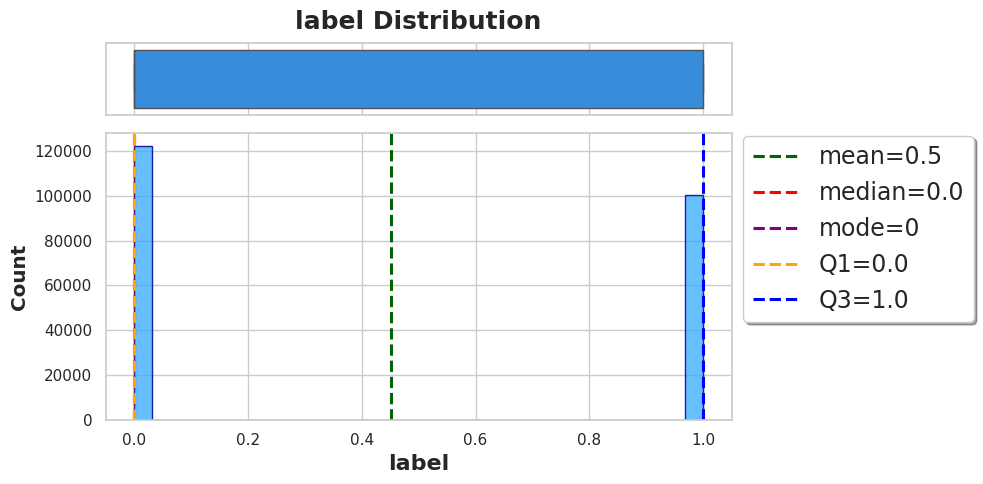

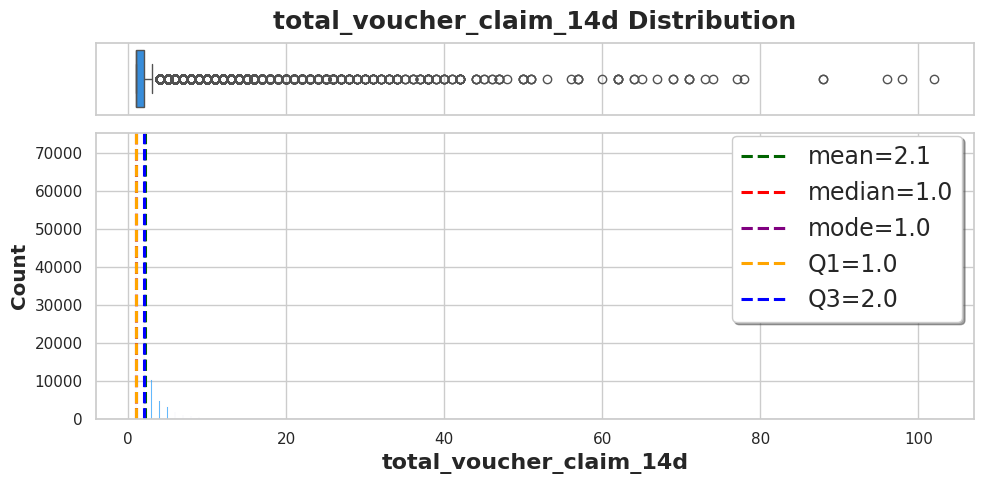

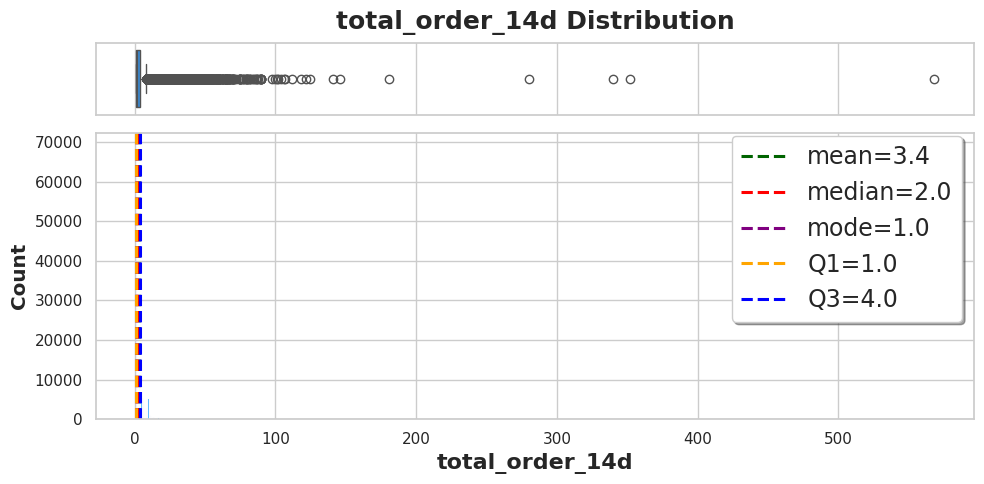

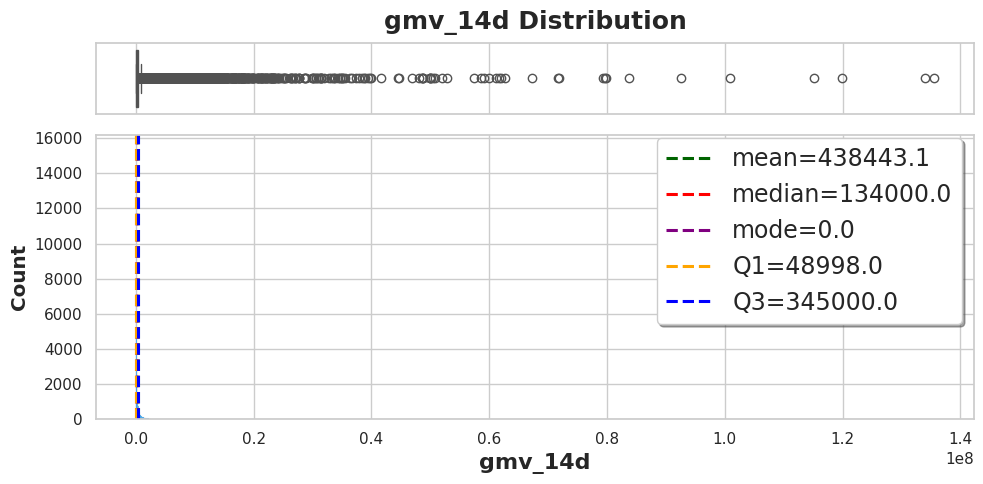

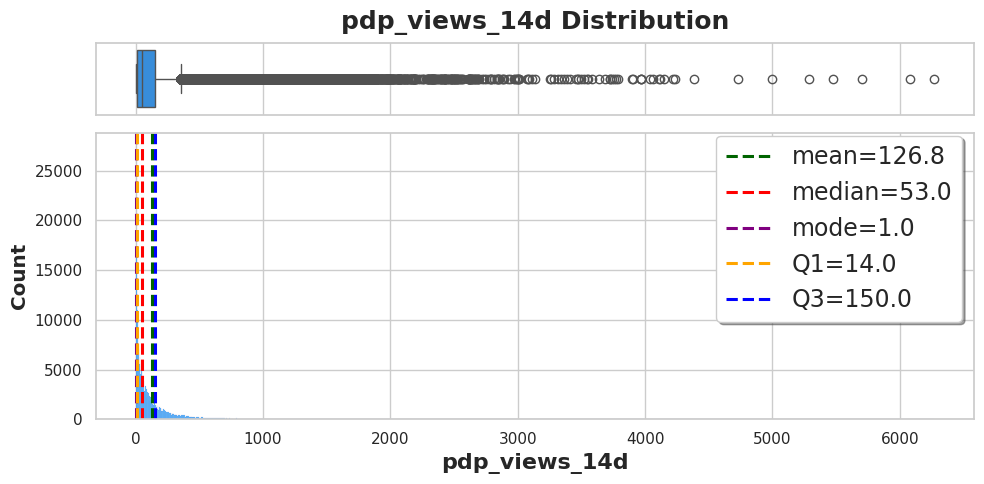

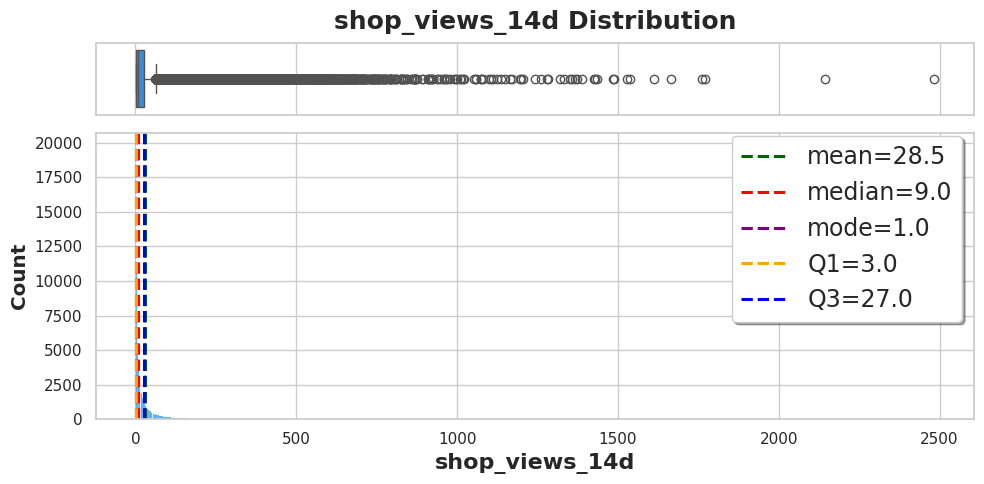

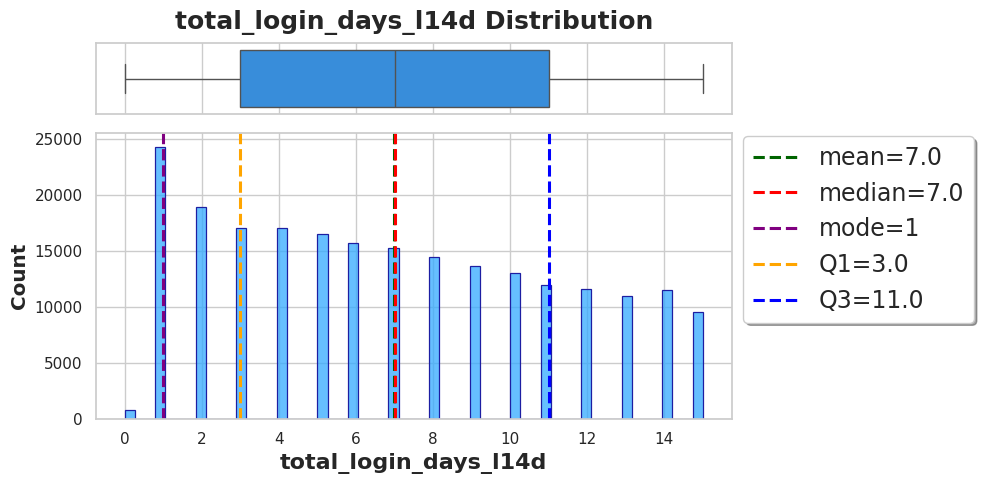

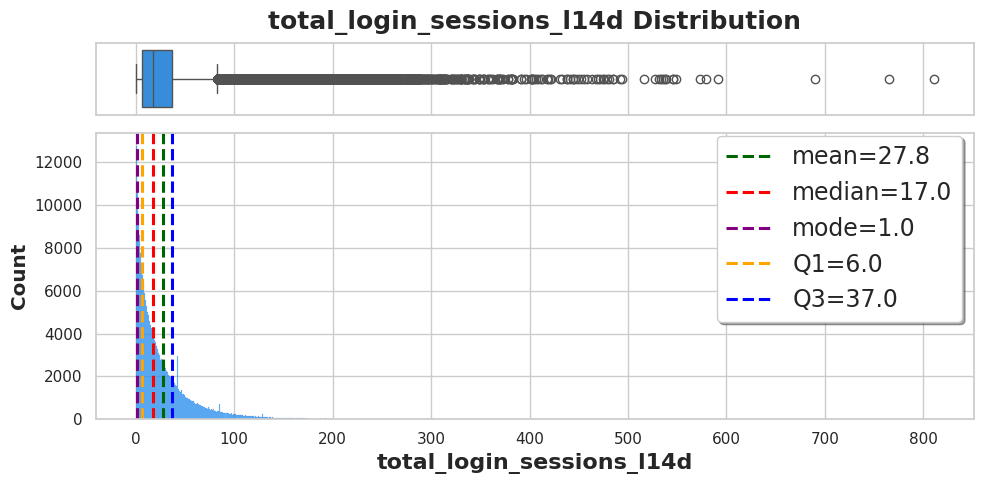

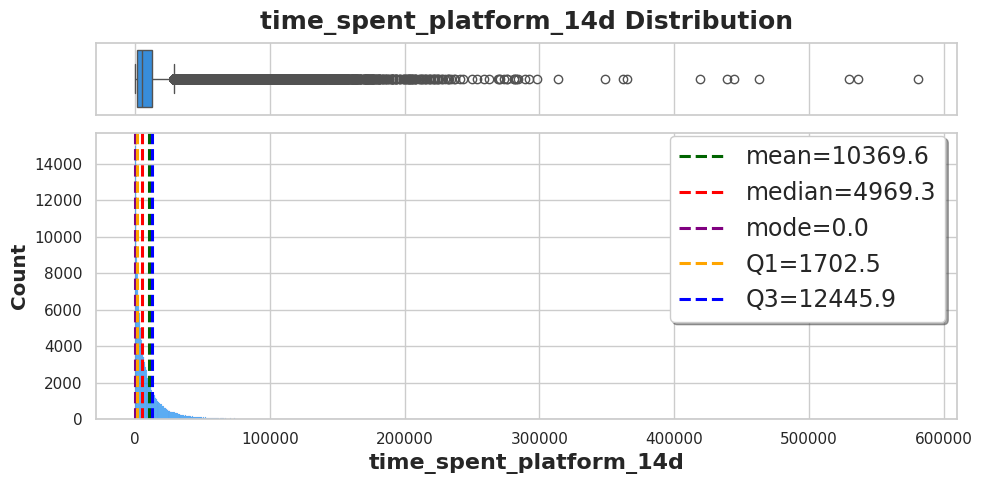

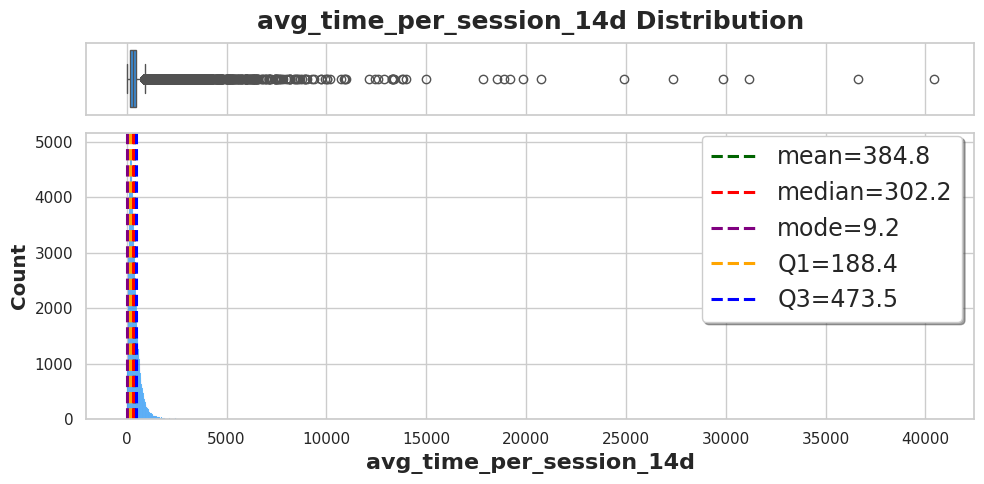

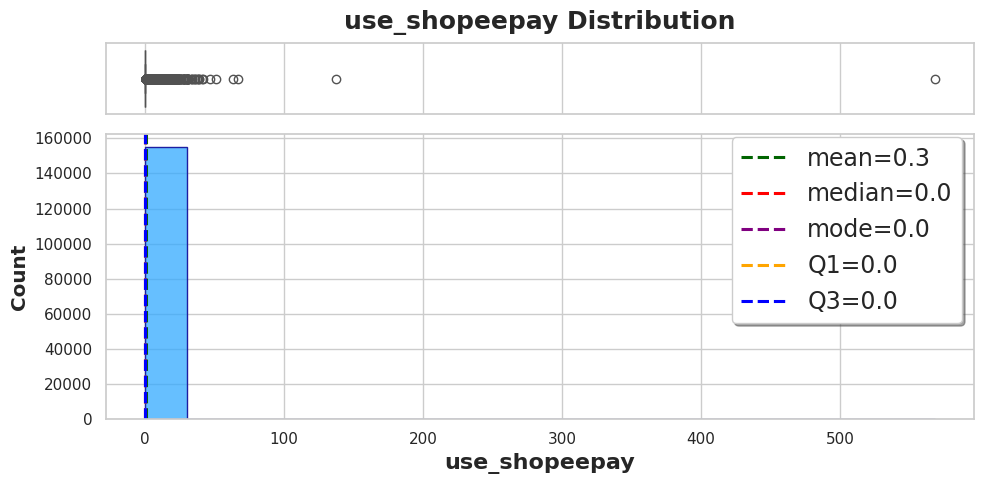

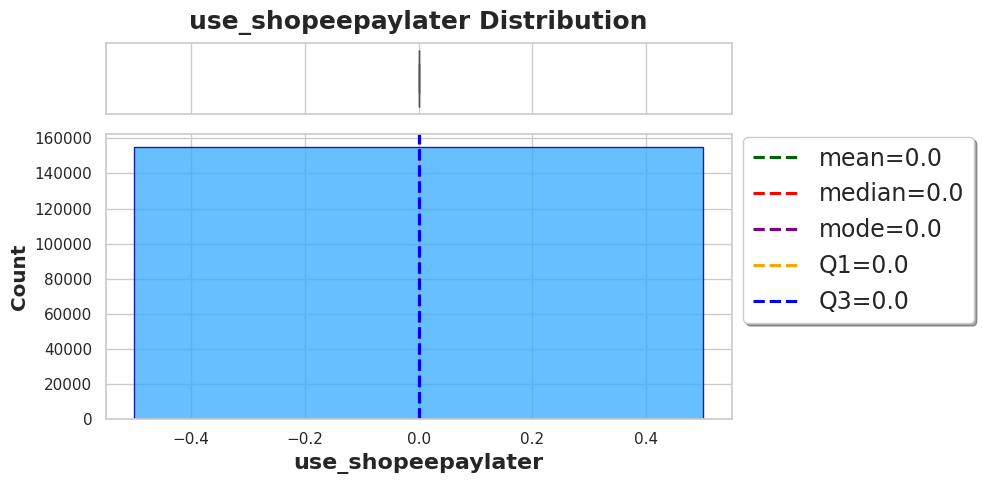

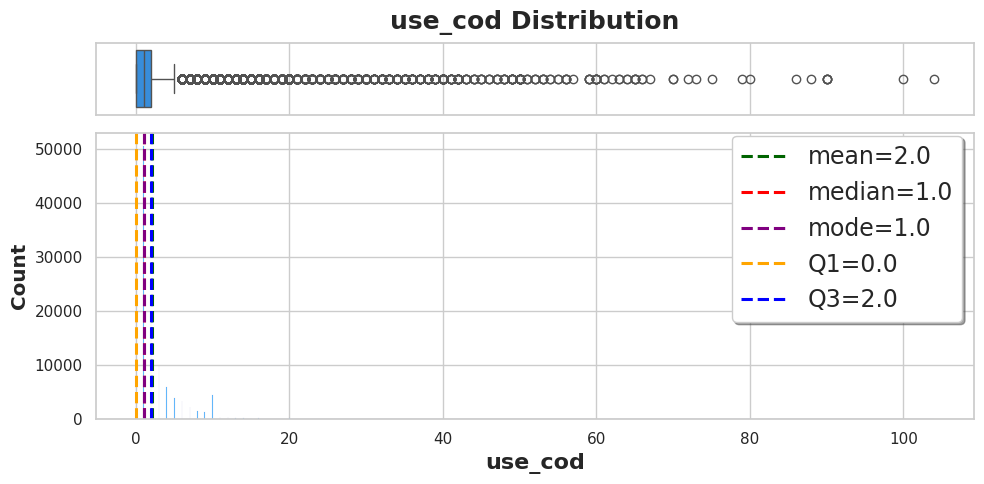

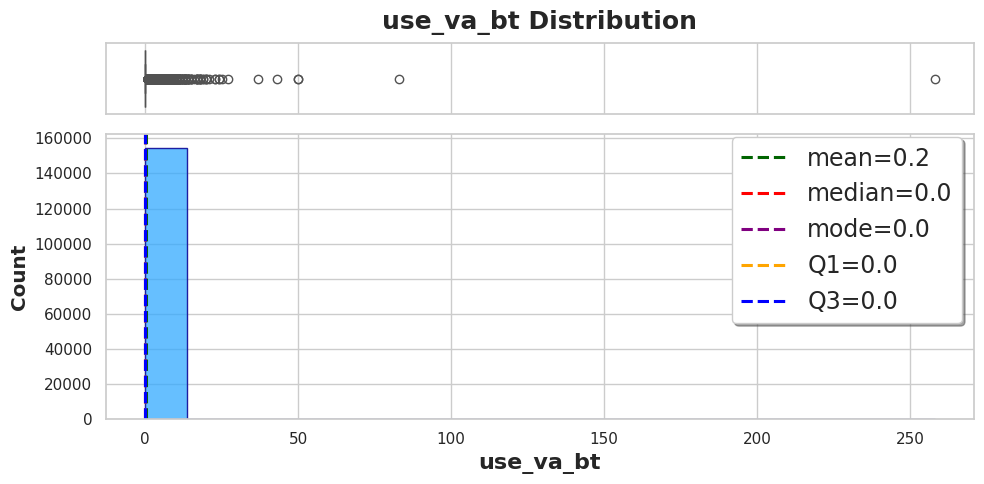

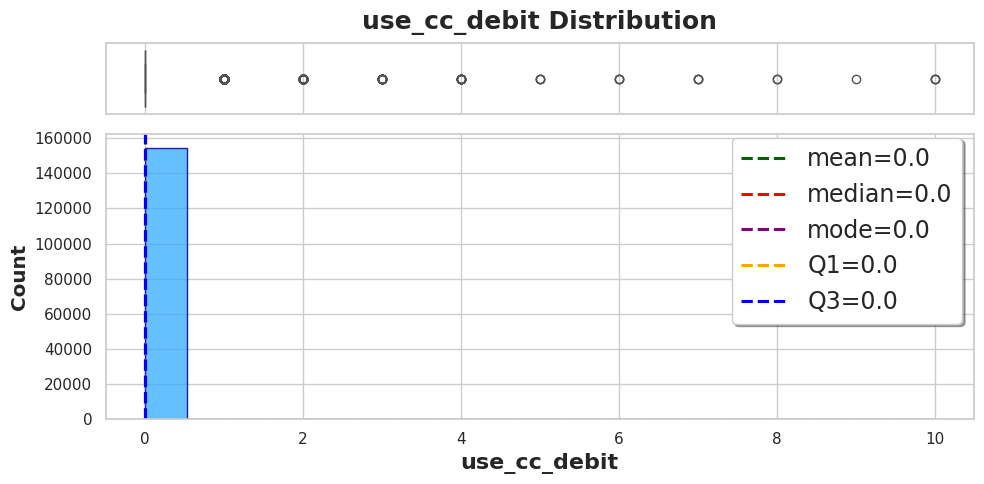

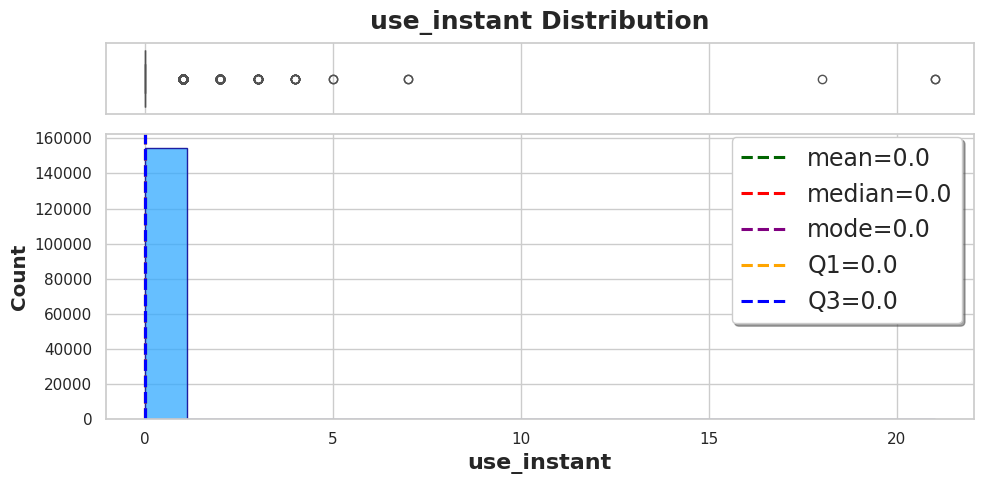

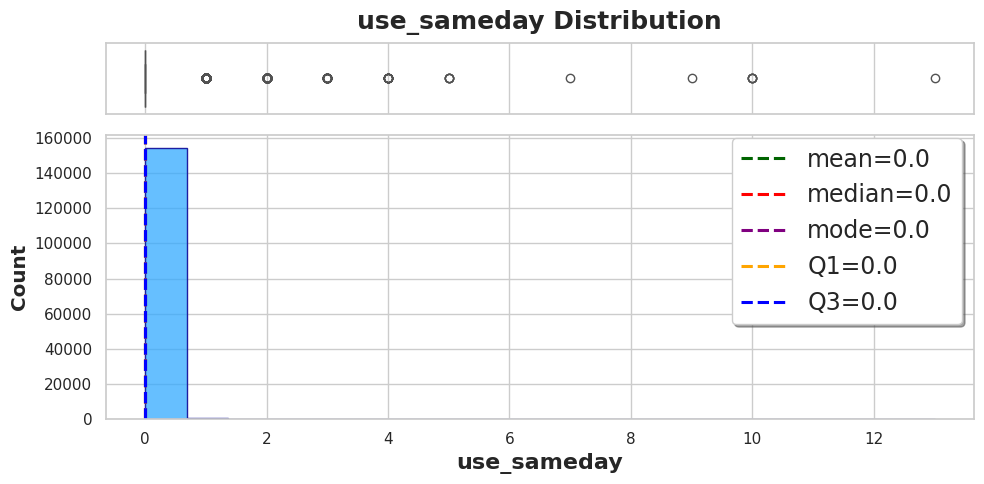

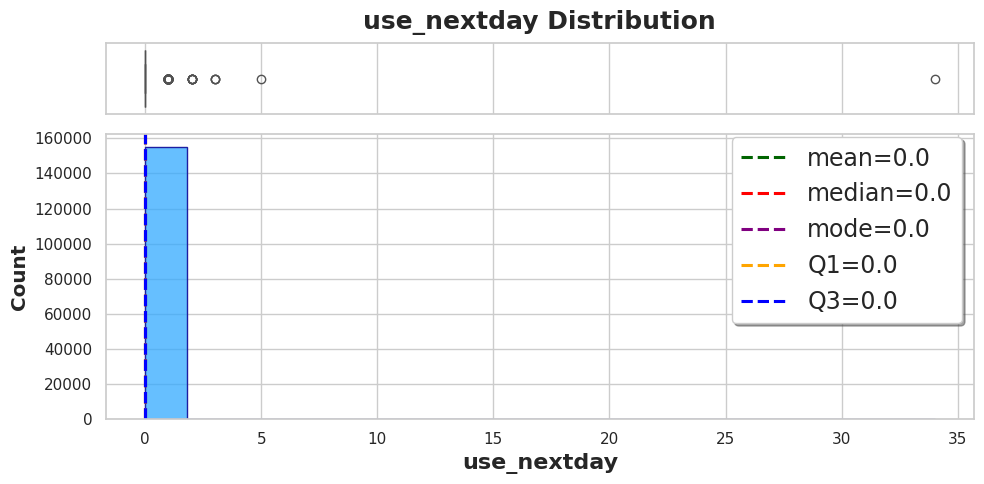

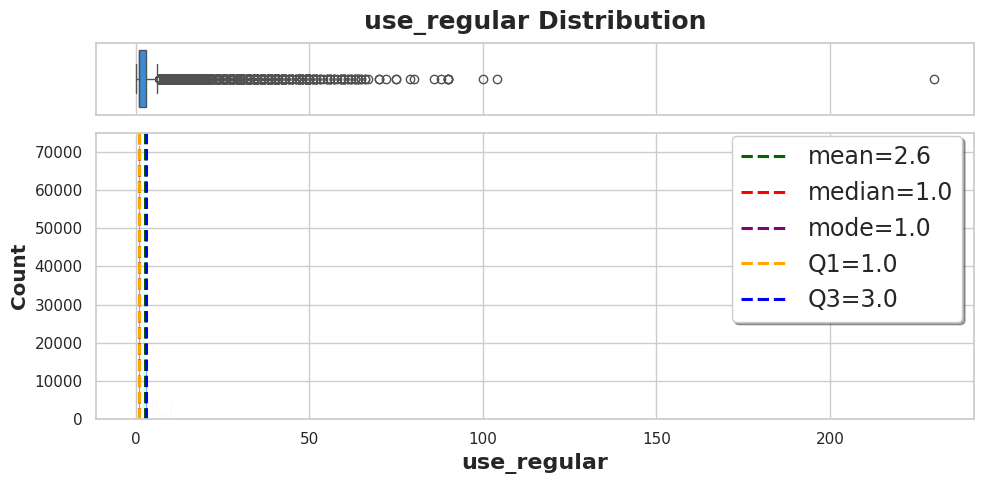

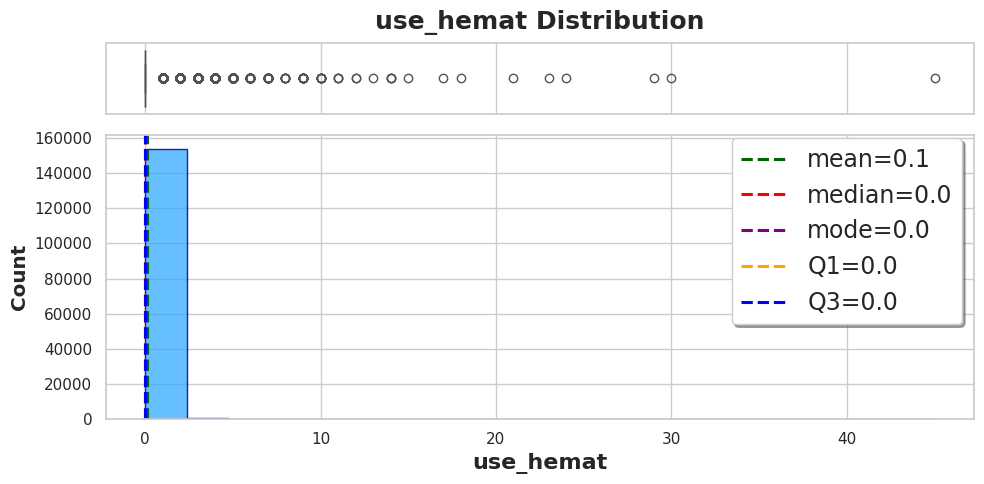

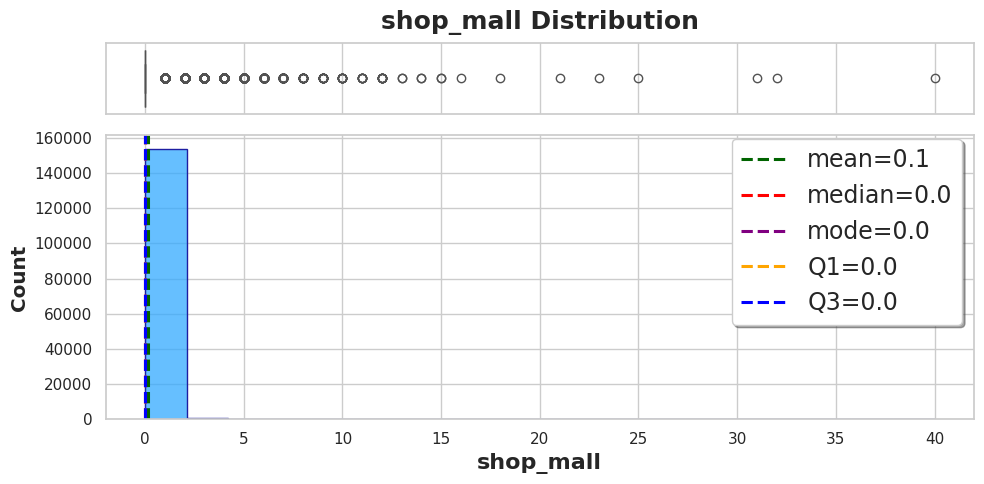

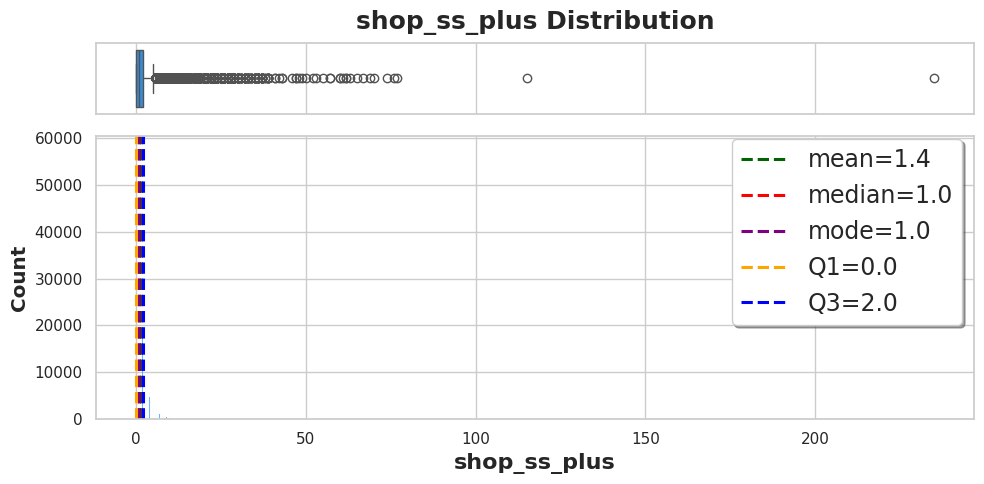

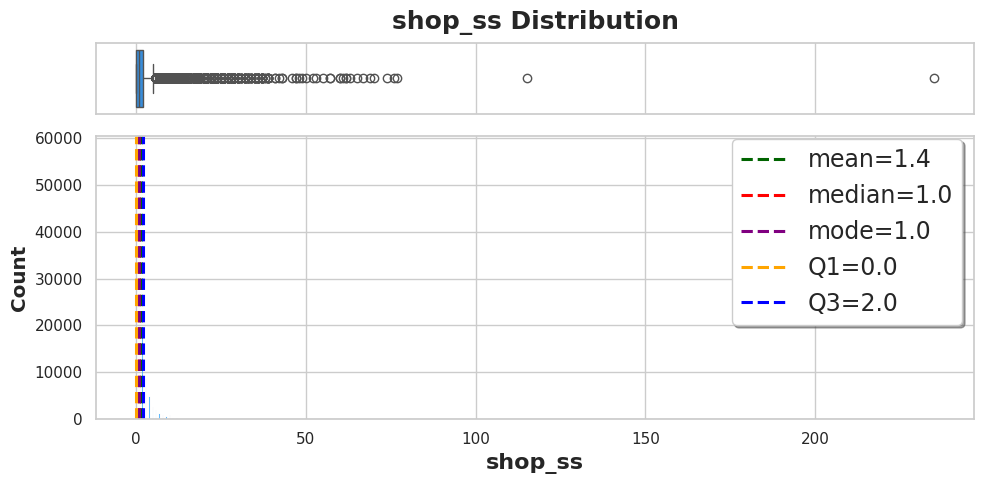

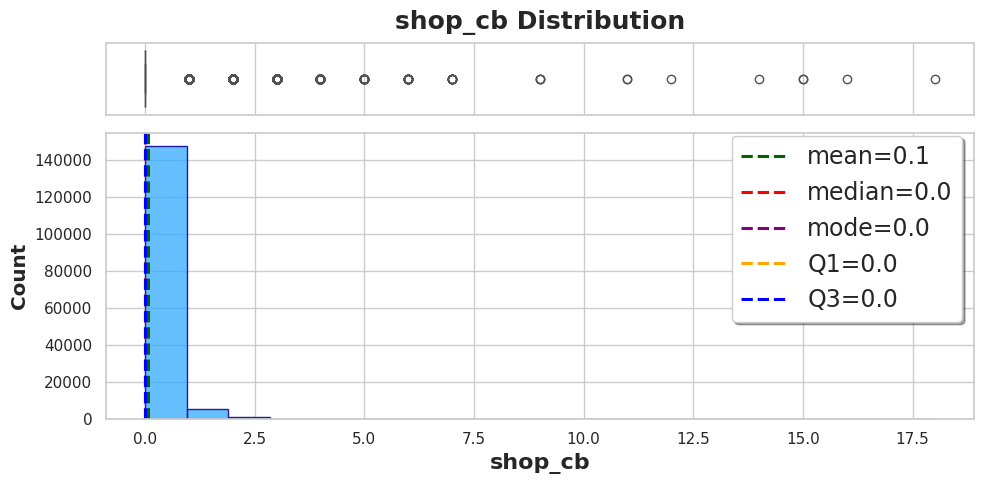

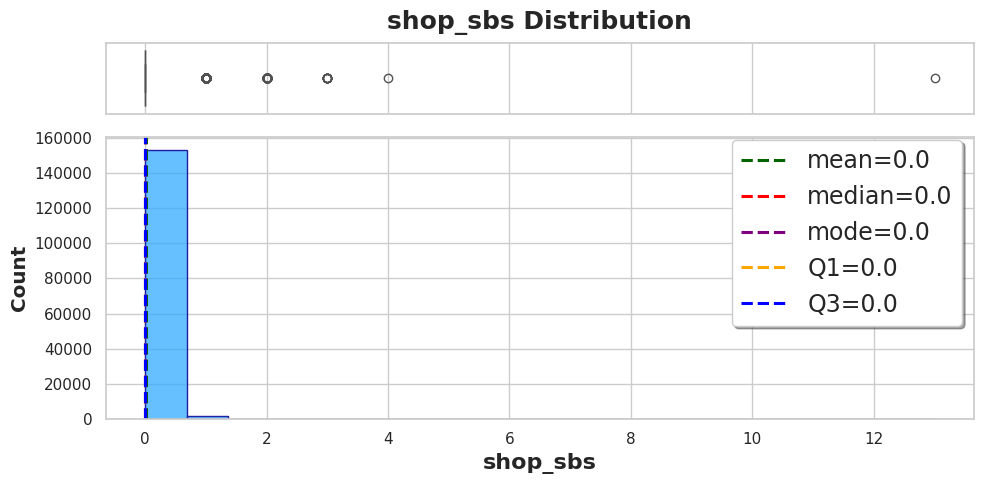

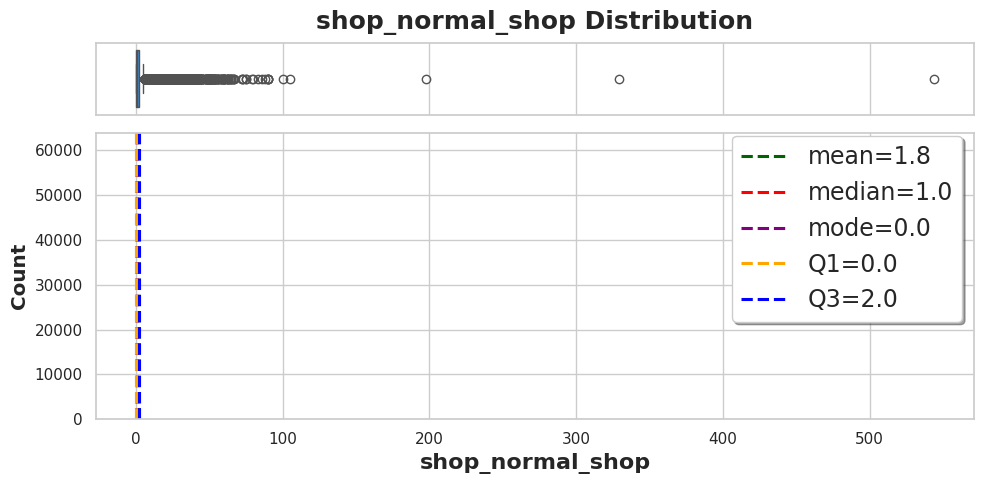

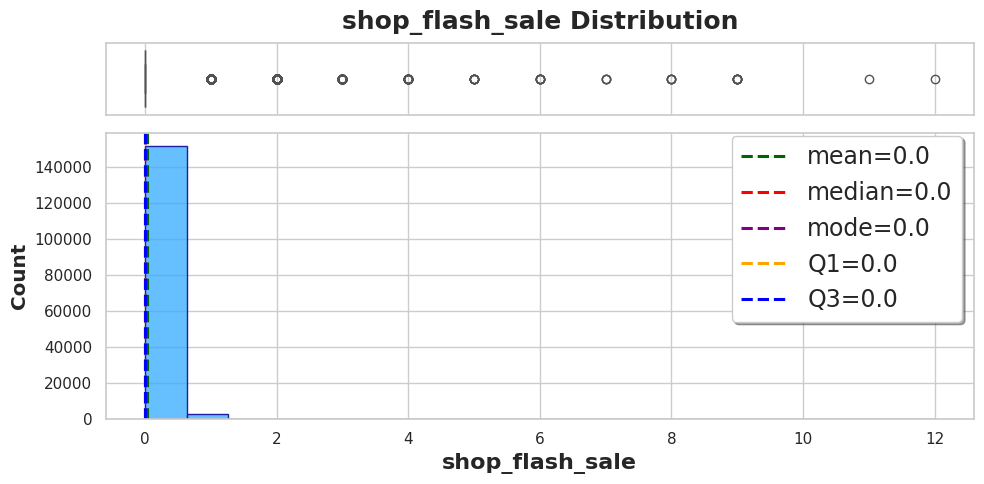

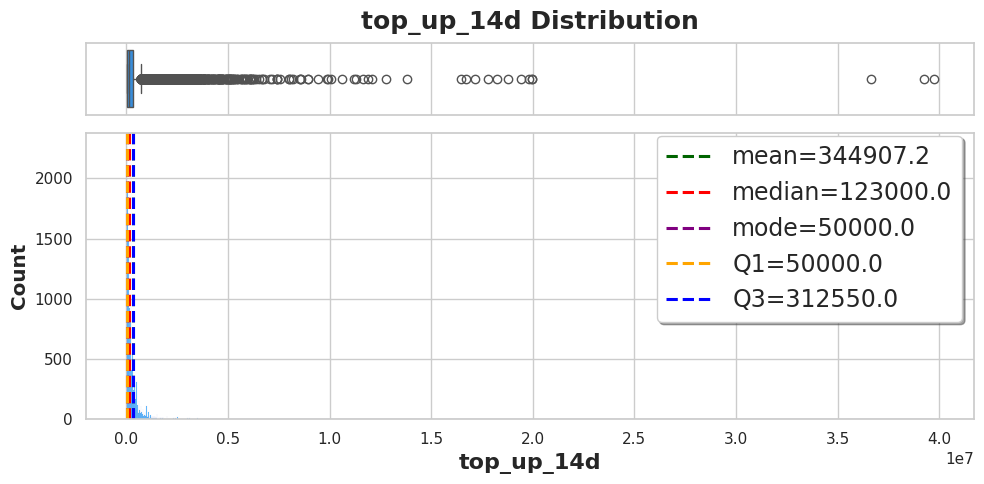

In [130]:
for feature in numerical_feats:
  num_plot(df, feature)

### Imbalance Assesment

#### Imbalance Feature

In [131]:
def top_freq_percentage(dataset, feats):
    top_freq_percentages = {}
    top_categories = {}

    for feature in feats:
        if feature != 'labels':
            value_counts = dataset[feature].value_counts()
            top_categories_list = value_counts.nlargest(3).index.tolist()
            top_freq_percentage_list = (value_counts[top_categories_list] / len(dataset)) * 100

            top_freq_percentages[feature] = top_freq_percentage_list.tolist()
            top_categories[feature] = top_categories_list

    top_freq_percentages_df = pd.DataFrame.from_dict(top_freq_percentages, orient='index', columns=['top1_percentage', 'top2_percentage', 'top3_percentage']).sort_values('top1_percentage', ascending=False)
    top_categories_df = pd.DataFrame.from_dict(top_categories, orient='index', columns=['top1_category', 'top2_category', 'top3_category'])

    result_df = pd.concat([top_freq_percentages_df, top_categories_df], axis=1)
    return result_df

In [132]:
imbalance_df = top_freq_percentage(df, categorical_feats)
imbalance_df

,top1_percentage,top2_percentage,top3_percentage,top1_category,top2_category,top3_category
is_dp_buyer_14d,96.700,3.300,NaN,0,1,None
is_buyer_14d,70.245,29.755,NaN,1,0,None
age_group,66.563,11.307,7.780,Unknown,19-24,<19
is_rural_or_urban,63.089,36.911,NaN,URBAN,RURAL,None
activate_shopeepay,56.734,43.266,NaN,1,0,None
gender,52.867,39.310,7.824,Female,Male,Unknown
region,44.937,37.987,17.076,Java non Jabodetabek,Non Java,Jabodetabek
new_buyer_initiative,32.725,17.383,12.292,FS0,COD,FSV
regist_date,1.075,0.990,0.965,2021-04-30,2021-04-14,2021-04-04


In [133]:
imbalance_df = top_freq_percentage(df, numerical_feats)
imbalance_df

,top1_percentage,top2_percentage,top3_percentage,top1_category,top2_category,top3_category
use_shopeepaylater,69.612,NaN,NaN,0.000,NaN,NaN
use_nextday,69.574,0.032,0.003,0.000,1.000,2.000
use_cc_debit,69.458,0.104,0.027,0.000,1.000,2.000
use_instant,69.389,0.175,0.031,0.000,1.000,2.000
use_sameday,69.295,0.255,0.040,0.000,1.000,2.000
shop_sbs,68.772,0.803,0.031,0.000,1.000,2.000
shop_flash_sale,68.035,1.363,0.162,0.000,1.000,2.000
shop_cb,66.424,2.569,0.461,0.000,1.000,2.000
use_hemat,65.324,3.244,0.653,0.000,1.000,2.000
shop_mall,63.372,4.786,0.949,0.000,1.000,2.000


#### Imbalance Label

In [134]:
unique_value_counts_with_percentage(df['label'])

,label,count,percentage
0,0,121895,54.814
1,1,100483,45.186


## 3. Data Dictionary


---



#### 1. User and Registration Information

| **Feature**            | **Description**                                 |
|------------------------|-------------------------------------------------|
| `user_id`              | Unique buyer identifier.                        |
| `regist_date`          | Date of buyer registration.                     |
| `gender`               | Buyer's gender.                                 |
| `age_group`            | Buyer's age group.                              |
| `region`               | Geographical region of the buyer.               |
| `is_rural_or_urban`    | Area classification: rural or urban.            |
| `new_buyer_initiative` | Campaign that attracted the buyer.              |


#### 2. Early Purchase Behavior

| **Feature**       | **Description**                                   |
|-------------------|---------------------------------------------------|
| `is_buyer_14d`    | Purchase made within the first 14 days.           |
| `is_dp_buyer_14d` | Down payment option used within the first 14 days.|


#### 3. Transactional Data

| **Feature**               | **Description**                                        |
|---------------------------|--------------------------------------------------------|
| `total_voucher_claim_14d` | Number of vouchers claimed in the first 14 days.       |
| `total_order_14d`         | Number of orders placed in the first 14 days.          |
| `gmv_14d`                 | Total Gross Merchandise Value (GMV) in the first 14 days.    |


#### 4. Platform Engagement Metrics

| **Feature**                      | **Description**                                        |
|----------------------------------|--------------------------------------------------------|
| `pdp_views_14d`                  | Product detail page views in the first 14 days.        |
| `shop_views_14d`                 | Store page views in the first 14 days.                 |
| `total_login_days_l14d`          | Unique login days in the first 14 days.                |
| `total_login_sessions_l14d`      | Total login sessions in the first 14 days.             |
| `time_spent_platform_14d`        | Total time spent on the platform in the first 14 days. |
| `avg_time_per_session_14d`       | Average time per session in the first 14 days.         |


#### 5. Payment and Financial Activity

| **Feature**           | **Description**                                          |
|-----------------------|----------------------------------------------------------|
| `use_shopeepay`       | Usage frequency of ShopeePay in the first 14 days.       |
| `use_shopeepaylater`  | Usage frequency of ShopeePayLater in the first 14 days.    |
| `use_cod`             | Usage frequency of Cash on Delivery (COD) in the first 14 days. |
| `use_va_bt`           | Usage frequency of Virtual Account/Bank Transfer in the first 14 days. |
| `use_cc_debit`        | Usage frequency of credit/debit cards in the first 14 days.|
| `use_instant`         | Usage frequency of instant payment methods in the first 14 days. |
| `activate_shopeepay`  | Status of ShopeePay account activation.                  |
| `top_up_14d`          | Amount topped-up to the digital wallet in the first 14 days.|


#### 6. Delivery and Shipping Preferences

| **Feature**     | **Description**                                         |
|-----------------|---------------------------------------------------------|
| `use_sameday`   | Same-day delivery option chosen in the first 14 days.   |
| `use_nextday`   | Next-day delivery option chosen in the first 14 days.   |
| `use_regular`   | Regular delivery option chosen in the first 14 days.    |
| `use_hemat`     | Budget-friendly shipping option chosen in the first 14 days.|


#### 7. Shop Interaction Behavior

| **Feature**           | **Description**                                       |
|-----------------------|-------------------------------------------------------|
| `shop_mall`           | Interaction with mall-type shops in the first 14 days.|
| `shop_ss_plus`        | Interaction with SS Plus shops in the first 14 days.  |
| `shop_ss`             | Interaction with SS shops in the first 14 days.       |
| `shop_cb`             | Interaction with CB shops in the first 14 days.       |
| `shop_sbs`            | Interaction with SBS shops in the first 14 days.      |
| `shop_normal_shop`    | Interaction with conventional shops in the first 14 days.|
| `shop_flash_sale`     | Participation in flash sale events in the first 14 days.|


#### 8. Outcome / Label

| **Feature** | **Description**                                 |
|-------------|-------------------------------------------------|
| `label`     | Target variable indicating buyer retention.   |

## 4. Data Preprocessing


---



In [147]:
df_preprocess = df.copy()

#### Handling Missing Values

In [148]:
desc_df[['feature', 'data_type', 'null_values', 'null_percentage']]

,feature,data_type,null_values,null_percentage
36,top_up_14d,float64,204966,92.170
9,total_voucher_claim_14d,float64,97907,44.030
11,gmv_14d,float64,67577,30.390
10,total_order_14d,float64,67577,30.390
20,use_cod,float64,67577,30.390
32,shop_sbs,float64,67577,30.390
33,shop_normal_shop,float64,67577,30.390
31,shop_cb,float64,67577,30.390
30,shop_ss,float64,67577,30.390
34,shop_flash_sale,float64,67577,30.390


In [149]:
def dynamic_null_queries(col_list):
    summaries = []
    for col_name in col_list:
        query_null_counts = f"""
        SELECT 
            label,
            SUM(CASE WHEN {col_name} IS NULL THEN 1 ELSE 0 END) AS null_count,
            SUM(CASE WHEN {col_name} IS NOT NULL THEN 1 ELSE 0 END) AS not_null_count
        FROM df_preprocess
        GROUP BY label;
        """
        query_less_than_one = f"""
        SELECT 
            {col_name}
        FROM df_preprocess
        WHERE {col_name} < 1;
        """
        result_null_counts = duckdb.query(query_null_counts).fetchdf()
        result_less_than_one = duckdb.query(query_less_than_one).fetchdf()
        
        is_have_0_value = not result_less_than_one.empty
        
        try:
            label0 = result_null_counts.loc[result_null_counts['label'] == 0].iloc[0]
            label1 = result_null_counts.loc[result_null_counts['label'] == 1].iloc[0]
            null_count_0 = label0['null_count']
            null_count_1 = label1['null_count']
            not_null_count_0 = label0['not_null_count']
            not_null_count_1 = label1['not_null_count']
            if (null_count_0 < null_count_1) and (not_null_count_0 > not_null_count_1):
                correlation = "Negative correlation"
            elif (null_count_0 > null_count_1) and (not_null_count_0 < not_null_count_1):
                correlation = "Positive correlation"
            else:
                correlation = "No Insight"
        except Exception:
            correlation = "No Insight (insufficient label data)"
        
        if result_less_than_one.empty:
            df_preprocess[col_name] = df_preprocess[col_name].fillna(0)
        
        summaries.append({
            "null_feature": col_name,
            "is_have_0_value": is_have_0_value,
            "deduced_correlation_based_on_null": correlation
        })
    summary_df = pd.DataFrame(summaries)
    return summary_df

In [150]:
null_feature = [
    "top_up_14d", "total_voucher_claim_14d", "gmv_14d", "total_order_14d",
    "use_cod", "shop_sbs", "shop_normal_shop", "shop_cb", "shop_ss", 
    "shop_flash_sale", "use_shopeepay", "shop_ss_plus", "use_shopeepaylater", 
    "use_sameday", "use_hemat", "use_regular", "use_nextday", "use_cc_debit", 
    "use_instant", "use_va_bt", "shop_mall", "shop_views_14d"
]

summary = dynamic_null_queries(null_feature)
summary

,null_feature,is_have_0_value,deduced_correlation_based_on_null
0,top_up_14d,False,Positive correlation
1,total_voucher_claim_14d,False,No Insight
2,gmv_14d,True,No Insight
3,total_order_14d,False,No Insight
4,use_cod,True,No Insight
5,shop_sbs,True,No Insight
6,shop_normal_shop,True,No Insight
7,shop_cb,True,No Insight
8,shop_ss,True,No Insight
9,shop_flash_sale,True,No Insight


#### Label Encoding

#### One-Hot Encoding

#### Feature Standardization

#### Correlation Matrix

In [ ]:
df_select_corr = df_preprocess[numerical_feats].corr()['label'][:-1]

# Select Feature dengan korelasi tinggi untuk di visualisasikan
best_feature = df_select_corr[abs(df_select_corr) >= 0.1].sort_values(ascending=False)

# Select Feature dengan korelasi rendah untuk di drop
drop_feature = df_select_corr[abs(df_select_corr) < 0.1].sort_values(ascending=False)

In [ ]:
low_corr_feature = drop_feature.index.tolist()
low_corr_feature

In [ ]:
best_feature_df = df_preprocess.loc[:, best_feature.index.tolist()].copy()
best_feature_df['label'] = df_preprocess['label']

In [ ]:
corr = best_feature_df.corr()
paper = plt.figure(figsize=(14,8))
sns.heatmap(corr[(corr>=0.1) | (corr<= -0.1)] ,
            cmap='winter', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 7}, square=True)

plt.show()

#### Variance Inflation Factor (VIF)

Variabel Inflation Factor (VIF) adalah ukuran statistik yang digunakan untuk mengevaluasi seberapa kuat multicollinearity terdapat di antara variabel independen dalam model regresi. Multikolinieritas perlu dihapus sebelum analisis Principal Component Analysis (PCA) karena PCA bergantung pada asumsi independensi variabel.

In [ ]:
# Fungsi untuk menghitung VIF
def calculate_vif(df):
    X = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.set_index('Variable')

In [ ]:
def handle_multicollinearity(df, threshold=5):
    # Lakukan iterasi terus menerus hingga tidak ada fitur yang memiliki VIF di atas treshold
    while True:
        vif_data = calculate_vif(df)
        # Jangan hitung constant dalam perhitungan max vif
        max_vif = vif_data.drop('const')['VIF'].max()
        if max_vif > threshold:
            variable_to_drop = vif_data[vif_data["VIF"] == max_vif].index[0]
            print("Dropping variable:", variable_to_drop, "VIF:", max_vif)
            df = df.drop(variable_to_drop, axis=1)
        else:
            break
    return df

In [ ]:
df_handled = handle_multicollinearity(best_feature_df)

In [ ]:
corr = df_handled.corr()
paper = plt.figure(figsize=(14,8))
sns.heatmap(corr[(corr>=0.1) | (corr<= -0.1)] ,
            cmap='winter', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 7}, square=True)

plt.show()

## 5. Data Modeling


---



## 6. Model Evaluation


---



## 7. Hyperparameter Tunning


---



## 8. Business Recommendation


---

